# ACTIVITY 4 - DATA MINING (Words Dataset)
## Author: Matheus Aparecido do Carmo Alves - 9791114

# DATA CLUSTERISATION

Hello everyone. Today we will study unsupervised learning for data clusterisation.

Our task will be to implement the K-means and Hierarchic Clusterisation Algorithms and analyse it.

Therefore, this paper presents: The K-Means implementation in Section [1](#sec1), and; The Hierarchic Clusterisation Algorithm implementation in Section [2](#sec2).

## 1. K-MEANS IMPLEMENTATION <a id=sec1></a>

In this Section, we will implement the K-Means Algorithm.

The first step is to import useful packages for this implementation.

For this task, we will use the Pandas Python Package and Sklearn Clusterisation Package KMeans Method.

In [1]:
# Importing the packages
import pandas as pd
from sklearn.cluster import KMeans

With the packages imported, we start extracting the data to apply the K-Means Algorithm.

In [2]:
# 1. Getting the data
# a. full data
words = pd.read_csv('words_data.csv',sep=',',header=None)

# b. removing the labels
words_ = words.drop(words.columns[0], axis=1)

# c. showing the loaded data
words

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,car,0.130859,0.008423,0.033447,-0.058838,0.040039,-0.142578,0.049316,-0.168945,0.208984,...,-0.275391,0.285156,-0.047363,0.064941,-0.112305,-0.025757,-0.041260,0.228516,-0.149414,-0.150391
1,bus,0.059326,-0.169922,0.038818,-0.049561,0.038330,-0.153320,-0.166016,-0.443359,0.239258,...,-0.011108,0.079590,0.130859,-0.211914,0.073730,0.081055,-0.158203,0.474609,0.059814,-0.244141
2,drive,-0.025879,0.097656,0.008972,-0.097656,-0.122070,-0.103516,0.030762,-0.167969,-0.006622,...,-0.011780,0.380859,-0.181641,0.257812,0.113281,-0.069336,-0.016479,-0.025635,-0.076172,-0.127930
3,road,0.111816,0.263672,0.085938,-0.083984,0.146484,-0.031738,-0.194336,-0.261719,-0.000030,...,-0.050781,0.035156,-0.292969,0.000927,0.032227,-0.038818,-0.110840,-0.067383,0.230469,-0.231445
4,devil,0.287109,-0.186523,0.161133,0.182617,-0.174805,0.367188,-0.018677,-0.026978,0.125977,...,-0.005371,-0.064941,-0.093262,-0.104980,-0.414062,0.026123,0.337891,-0.033203,-0.195312,0.028687
5,fire,0.355469,0.183594,0.149414,-0.093750,0.178711,-0.083984,-0.063965,-0.257812,-0.117188,...,0.215820,-0.261719,-0.269531,0.116211,0.021606,-0.060791,-0.189453,0.049805,-0.222656,0.004059
6,hell,0.277344,-0.091797,0.069336,0.287109,0.042480,0.188477,-0.198242,-0.055908,0.126953,...,0.032715,-0.029541,-0.312500,0.181641,-0.298828,0.011719,-0.017944,-0.201172,-0.110840,-0.079590
7,dead,0.149414,0.165039,0.273438,0.092285,0.002426,0.094727,0.070801,-0.359375,0.104004,...,0.059082,-0.241211,-0.161133,0.091309,0.027100,-0.010315,-0.199219,-0.105469,0.050537,0.004547
8,dark,0.121094,0.145508,0.145508,-0.206055,0.047119,-0.018677,0.035889,-0.205078,0.198242,...,-0.225586,0.204102,-0.111816,0.096680,-0.197266,-0.068848,0.111816,0.042480,0.167969,0.168945
9,golf,-0.017578,0.049072,0.084961,0.047119,-0.112793,-0.083984,-0.062988,-0.055908,0.285156,...,-0.066895,0.166992,0.012146,0.051758,0.291016,0.093750,0.037598,0.106934,-0.133789,0.074219


Now, we will apply the K-Means Algorithm to fit the extracted dataset.

In [3]:
# 2. Appling the K-Means Algorithm
kmeans_results = KMeans(n_clusters=3).fit(words_)

The resulting clustering data is shown below:

In [4]:
# 3. Showing the result
for label in range(3):
    print 'GROUP',label,':'
    for word_index in range(len(words)):
        if label == kmeans_results.labels_[word_index]:
            print '(%2.0f)' % word_index,words[0][word_index]

GROUP 0 :
( 4) devil
( 6) hell
( 7) dead
( 8) dark
GROUP 1 :
( 9) golf
(10) sports
(11) racing
(13) soccer
(14) game
(15) rugby
GROUP 2 :
( 0) car
( 1) bus
( 2) drive
( 3) road
( 5) fire
(12) circuit


Analysing the results, we can conclude that, with the given data parametrisation, K-Means Algorithm is able to clusterise the data semantically (Group 1: traffic semantic; Group 2: sports semantic; Group 3: "dark" semantic) That is, the words in the same created cluster have semantical proximity, fitted by the given data parameters.

## 2. Hierarquic Clusterisation Algorithm <a id=sec2></a>

In this Section, we will implement the Hierarchic Clusterisation Algorithm.

The first step is to import useful packages for this implementation.

For this task, we will use the Pandas Python Package, Sklearn Clusterisation Package Hierarchy Linkage Method and the Matplotlib Python Plot Package.

We already included the Pandas Python Package. To include the Hierarchy Linkage Method, we use the following line:

In [5]:
# Adding the packages
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Furthermore, we already extracted the data in Section [1](#sec1).

In this way, we start to fit the data using the Hierarchy Linkage Method.

In [6]:
# 1. Appling the Hierarchic Algorithm
hierarchy_result = linkage(words_,'ward')

With the result, we build and plot a dendrogram to analyse the hierarchical clusterisation.

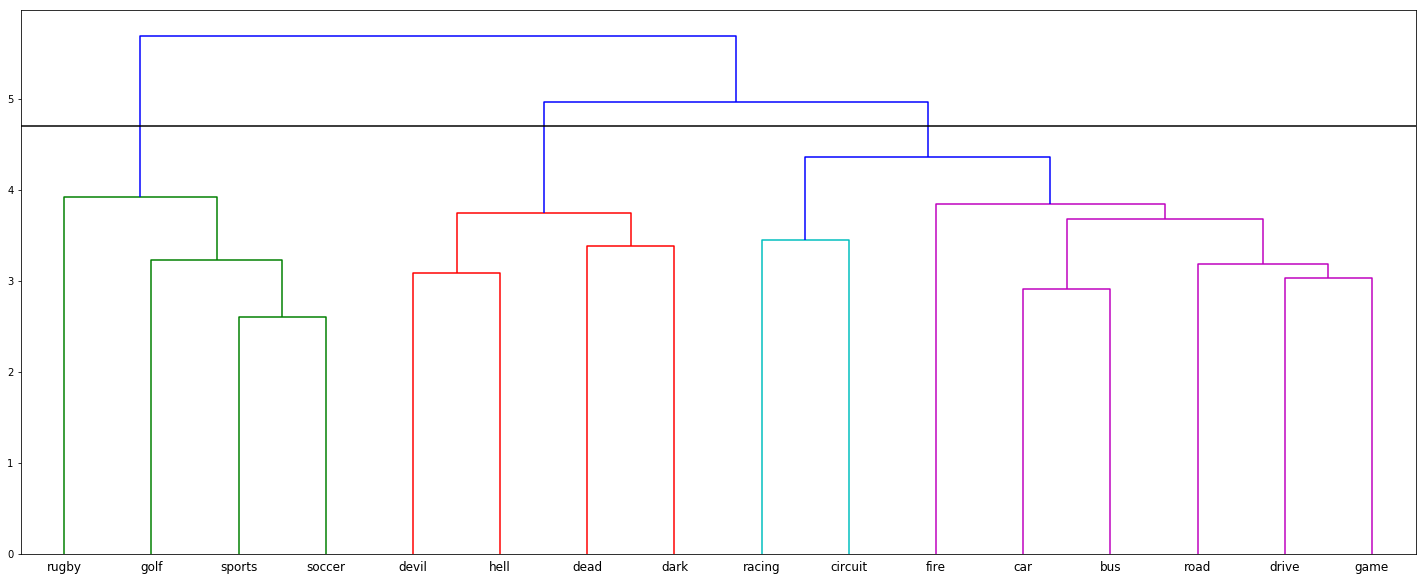

In [7]:
# 2. Plotting the dendogram
fig = plt.figure(figsize=(25, 10))
labels = [words[0][word_index] for word_index in range(len(words))]
plt.axhline(y=4.7, c='k')
dn = dendrogram(hierarchy_result,labels=labels)
plt.show()

For comparison with the K-Means Clustering result, we will consider three groups for hierarchical clustering.

The horizontal line indicates the point at which the data set split into three groups:

Group green :

- ( 9) golf
- (15) rugby
- (10) sports
- (13) soccer

Group red :

- ( 4) devil
- ( 6) hell
- ( 7) dead
- ( 8) dark

Group blue + pink :

- (11) racing
- (12) circuit
- ( 5) fire
- ( 0) car
- ( 1) bus
- ( 3) road
- ( 2) drive
- (14) game

Analysing the results, the Hierarquic Method clusterised the data semantically as the K-Means Algorithm. However, the created groups are differents at the end.

In general, the Hierarchical Method clusterised the words (11) race and (12) circuit separated of golf, rugby, sports and soccer. Assuming that Hierarchic Algorithm performed a semantic clusterisation, we can conclude that, in a different way of the K-Means Algorithm, it considered that racing and car have higher proximity to traffic words (e.g.,  Group pink: cars and bus) than sports words (e.g., Group green: golf and rugby).